<a href="https://colab.research.google.com/github/annakopeikina/-annakopeikina-gEEKbRAIN_end-of-semestr_project/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Создать функцию по определению предсказанного класса

In [ ]:
%pip install accelerate
%pip install transformers[torch]

In [ ]:
%pip install Pillow==10.1.0
%pip install torch==2.1.2
%pip install torchvision==0.16.2
%pip install transformers==4.40.0
%pip install accelerate==0.30.1

In [4]:
import torch

In [5]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7083, 0.6588, 0.6187],
        [0.0321, 0.6285, 0.9452],
        [0.6107, 0.0338, 0.2020],
        [0.2500, 0.6150, 0.9009],
        [0.2136, 0.3436, 0.0502]])


In [6]:
torch.cuda.is_available()

False

In [7]:
torch.__version__

'2.1.2+cu121'

In [ ]:
%pip install matplotlib

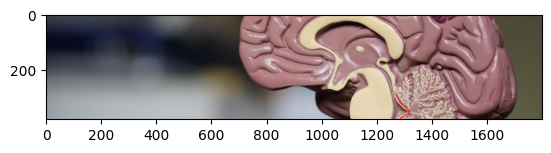

In [9]:
import urllib.request
url = 'https://storage.googleapis.com/kaggle-datasets-images/1368849/2273203/375af3978725640b9d5ec180b9b948be/dataset-cover.jpg?t=2021-05-26-15-08-10'
filename = 'cover.jpg'
urllib.request.urlretrieve(url, filename)

from PIL import Image
from matplotlib import pyplot as plt

img = Image.open('cover.jpg');
plt.imshow(img);

In [10]:
model = torch.hub.load( 'pytorch/vision:v0.10.0', 'resnet34', pretrained=True )

model.eval()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 201MB/s]


In [11]:
from torchvision import models, transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [12]:
import requests
from io import BytesIO
import json

In [14]:
# Загрузка меток классов
with open('imagenet_classes.txt') as f:
    IMAGENET_LABELS = [line.strip() for line in f.readlines()]

In [15]:
def class_of_picture(url):
    # Загрузка изображения
    urllib.request.urlretrieve(url, "input_image.jpg")
    img = Image.open("input_image.jpg")

    # Преобразование изображения
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)  # Создание батча из одного изображения

    # Проверка, доступен ли GPU
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    input_batch = input_batch.to(device)

    # Предсказание класса
    with torch.no_grad():
        outputs = model(input_batch)

    # Получение индекса класса с наибольшим значением
    prediction_idx = outputs[0].argmax(0).item()

    # Получение текстовой метки класса
    label = IMAGENET_LABELS[prediction_idx]
    return label

In [16]:
url = 'https://storage.googleapis.com/kaggle-datasets-images/1368849/2273203/375af3978725640b9d5ec180b9b948be/dataset-cover.jpg?t=2021-05-26-15-08-10'
predicted_class = class_of_picture(url)
print(f"Предсказанный класс: {predicted_class}")

Предсказанный класс: 580, plastic_brain


2. Проиллюстрировать разброс классов в ImageNet

In [ ]:
%pip install deeppavlov

In [ ]:
%pip install wget

In [3]:
import urllib.request

url = "http://files.deeppavlov.ai/deeppavlov_data/bert/sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz"
filename = "sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz"
urllib.request.urlretrieve(url, filename)


('sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz',
 <http.client.HTTPMessage at 0x7db07641eef0>)

In [4]:
!tar -xzvf sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz

sentence_ru_cased_L-12_H-768_A-12_pt/
sentence_ru_cased_L-12_H-768_A-12_pt/pytorch_model.bin
sentence_ru_cased_L-12_H-768_A-12_pt/bert_config.json
sentence_ru_cased_L-12_H-768_A-12_pt/vocab.txt


In [5]:
from deeppavlov.core.common.file import read_json
from deeppavlov import build_model, configs

In [6]:
bert_config = read_json(configs.embedder.bert_embedder)
bert_config['metadata']['variables']['BERT_PATH'] = '/content/sentence_ru_cased_L-12_H-768_A-12_pt'
model = build_model( bert_config )

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
path = 'C:/Users/annav/OneDrive/Desktop/HW1/sentence_ru_cased_L-12_H-768_A-12_pt'

In [ ]:
%pip install torchaudio==2.1.2 torchvision==0.16.2

In [9]:
import torch
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def get_sentence_embedding( sentence ):
    bert_answer = model([sentence])
    embedding = bert_answer[4]
    return embedding

In [10]:
%pip cache purge

Files removed: 3125


In [ ]:
%pip install pipdeptree
%pipdeptree

In [ ]:
!python -m venv new_env
!new_env\Scripts\activate
%pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 transformers[torch] accelerate


In [13]:
import bz2
import pandas as pd

In [14]:
import torch
import torchvision
import deeppavlov
import transformers

print(f"torch version: {torch.__version__}")

print(f"deeppavlov version: {deeppavlov.__version__}")
print(f"transformers version: {transformers.__version__}")

torch version: 2.1.2+cu121
deeppavlov version: 1.7.0
transformers version: 4.40.0


In [ ]:
%pip install tensorflow

In [ ]:
%pip install tensorflow-datasets

In [18]:
import pandas as pd

df = pd.read_csv('/content/svoboda_news_with_subcategories.csv', low_memory=False)

print(df.head())
print(df['Category'].unique())

            Category Subcategory  \
0  Авторские проекты      Россия   
1  Авторские проекты      Россия   
2  Авторские проекты      Россия   
3  Авторские проекты      Россия   
4  Авторские проекты      Россия   

                                               Title  \
0                            Отсидеться не получится   
1  Зима обойдется дороже. Чего ждать от новой сис...   
2                           Пришли за родственниками   
3  Тормозящая страна. Какие риски в России начали...   
4  "Выбиваются из людоедского контура". Аномалии ...   

                                                Link  
0  https://www.svoboda.org//a/otsidetjsya-ne-polu...  
1  https://www.svoboda.org//a/chego-zhdatj-ot-nov...  
2  https://www.svoboda.org//a/prishli-za-rodstven...  
3  https://www.svoboda.org//a/tormozyaschaya-stra...  
4  https://www.svoboda.org//a/vybivayutsya-iz-lyu...  
['Авторские проекты' 'Мнения']


In [ ]:
%pip install ipywidgets

In [20]:
df = pd.read_csv('/content/svoboda_news_with_subcategories.csv', low_memory=False)

In [21]:
import os

model_path = '/content/sentence_ru_cased_L-12_H-768_A-12_pt'
files = os.listdir(model_path)
print(files)


['config.json', 'pytorch_model.bin', 'vocab.txt', 'bert_config.json']


In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [24]:
from transformers import BertTokenizer, BertModel, BertConfig

model_path = r'/content/sentence_ru_cased_L-12_H-768_A-12_pt'

config = BertConfig.from_pretrained(model_path)

tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertModel.from_pretrained(model_path, config=config)

In [25]:
def get_bert_embeddings(texts):

    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    embeddings = outputs.last_hidden_state
    return embeddings

texts = ["Карма кома!", "Wareika Paloma?"]
embeddings = get_bert_embeddings(texts)
print(embeddings)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tensor([[[-0.5070, -0.4046, -0.5789,  ...,  0.0218, -0.5232,  1.4113],
         [-0.4600, -0.4491, -0.7984,  ...,  0.1766, -0.4734,  1.3281],
         [-0.3922, -0.6088, -0.5955,  ...,  0.2029, -0.4051,  1.2909],
         ...,
         [-0.5092, -0.4001, -0.5840,  ..., -0.0050, -0.5566,  1.4868],
         [-0.4976, -0.4623, -0.5751,  ...,  0.0149, -0.5479,  1.4382],
         [-0.4601, -0.4505, -0.5778,  ..., -0.0058, -0.4517,  1.3960]],

        [[-0.8836,  0.6970,  0.2811,  ..., -0.1509, -0.6951,  0.6261],
         [-1.1023,  0.6750,  0.1450,  ..., -0.2190, -0.4132,  0.5142],
         [-1.0775,  0.6827,  0.2191,  ..., -0.2136, -0.4465,  0.5790],
         ...,
         [-0.7844,  0.4591,  0.1968,  ...,  0.0261, -0.6594,  0.7552],
         [-0.8310,  0.7332,  0.2509,  ..., -0.0243, -0.8092,  0.5698],
         [-0.8718,  0.5885,  0.2294,  ..., -0.2739, -0.7502,  0.6434]]])


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Load the dataset
df = pd.read_csv(r'/content/svoboda_news_with_subcategories.csv')

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('/content/sentence_ru_cased_L-12_H-768_A-12_pt')

# Tokenize and encode the dataset
def tokenize_function(texts):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=512)

# Prepare text and labels
texts = df['Title'].tolist()
labels = df['Category'].astype('category').cat.codes.tolist()  # Convert categories to numeric codes

# Split the dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [27]:
import torch
from torch.utils.data import Dataset

class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenize_function(text)
        return {
            'input_ids': torch.tensor(encoding['input_ids']),
            'attention_mask': torch.tensor(encoding['attention_mask']),
            'labels': torch.tensor(label)
        }

train_dataset = NewsDataset(train_texts, train_labels, tokenizer)
val_dataset = NewsDataset(val_texts, val_labels, tokenizer)


In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Initialize the model
model = BertForSequenceClassification.from_pretrained('/content/sentence_ru_cased_L-12_H-768_A-12_pt', num_labels=len(df['Category'].unique()))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()


In [ ]:
%pip install datasets

In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
df = pd.read_csv('/content/svoboda_news_with_subcategories.csv')

dataset = Dataset.from_pandas(df)

In [32]:
import pandas as pd

df = pd.read_csv('/content/svoboda_news_with_subcategories.csv')

print(df.columns)


Index(['Category', 'Subcategory', 'Title', 'Link'], dtype='object')


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

df = pd.read_csv('/content/svoboda_news_with_subcategories.csv')


df['label'] = pd.factorize(df['Category'])[0]


train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Title'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

model_path = '/content/sentence_ru_cased_L-12_H-768_A-12_pt'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=len(df['label'].unique()))

max_length = 512


train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_length)

train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

results = trainer.evaluate()
print(results)
model.save_pretrained('path/to/save/model')
tokenizer.save_pretrained('path/to/save/model')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/sentence_ru_cased_L-12_H-768_A-12_pt and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss


{'eval_loss': 0.6803742051124573, 'eval_runtime': 0.8783, 'eval_samples_per_second': 15.941, 'eval_steps_per_second': 2.277, 'epoch': 3.0}


('path/to/save/model/tokenizer_config.json',
 'path/to/save/model/special_tokens_map.json',
 'path/to/save/model/vocab.txt',
 'path/to/save/model/added_tokens.json')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

df = pd.read_csv('/content/svoboda_news_with_subcategories.csv')

df['label'] = pd.factorize(df['Category'])[0]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Title'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

model_path = '/content/sentence_ru_cased_L-12_H-768_A-12_pt'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=len(df['label'].unique()))

max_length = 512

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_length)

train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

results = trainer.evaluate()
print(results)

model.save_pretrained('path/to/save/model')
tokenizer.save_pretrained('path/to/save/model')


In [ ]:
%pip install matplotlib seaborn

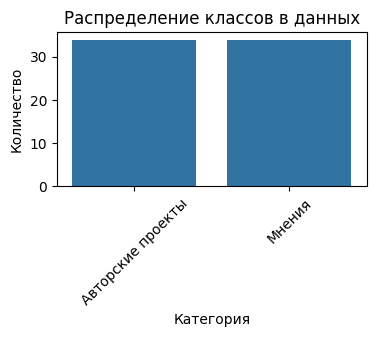

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузите данные
df = pd.read_csv('/content/svoboda_news_with_subcategories.csv')

# Присвойте числовые метки каждой категории
df['label'] = pd.factorize(df['Category'])[0]

# Постройте график распределения классов
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Category')
plt.title('Распределение классов в данных')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)  # Повернуть метки оси X, если нужно
plt.show()


In [ ]:
%pip install plotly

In [ ]:
%pip install nbformat

In [40]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
import plotly.express as px

df = pd.read_csv('/content/svoboda_news_with_subcategories.csv')

model_path = '/content/sentence_ru_cased_L-12_H-768_A-12_pt'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertModel.from_pretrained(model_path)

def get_sentence_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

sample_size = min(len(df), 888)
sample_df = df.sample(n=sample_size, random_state=42)
embeddings = np.concatenate([get_sentence_embedding(title) for title in sample_df['Title']], axis=0)

pca = PCA(n_components=3, random_state=42)
embeddings_3d = pca.fit_transform(embeddings)

plot_df = pd.DataFrame(embeddings_3d, columns=['PCA1', 'PCA2', 'PCA3'])
plot_df['Subcategory'] = sample_df['Subcategory'].values
plot_df['Title'] = sample_df['Title'].values

fig = px.scatter_3d(
    plot_df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Subcategory',
    hover_name='Title',
    title='3D Scatter Plot of News Titles'
)

fig.update_layout(scene=dict(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    zaxis_title='PCA Component 3'
), width=1000, height=800)

fig.show()


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
